# **El dataset elegido en PYTHON, realice tres tecnicas de preprocesamiento. Explique la razón de aplicar estas técnica**

Importamos el dataset

In [3]:
import pandas as pd
archivo="/content/drive/MyDrive/data/water_potabilityImputacion.csv"
datos=pd.read_csv(archivo)
print(datos.head)

<bound method NDFrame.head of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

**Primera técnica de preprocesamiento ReplaceMissingValues**

Como podemos observar más arriba tenemos datos nulos en nuestro data set como el primer valor ph, esto nos puede dar problemas a la hora de llevar nuestros datos a un algoritmo de maching learning por eso es mejor aplicar Replace Missing Values o imputación para reemplazar los nan con la media de cada columna

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
#algoritmo visto en clases
imputador = SimpleImputer(missing_values=np.nan, strategy="mean")

# Aplicar la imputación a mis datos
datos_imputados = imputador.fit_transform(datos)

# Creamos un nuevo DataFrame con los datos imputados para mostrar como el dataset
datos_imputados = pd.DataFrame(datos_imputados, columns=datos.columns)

# Mostrar el conjunto de datos imputados
print("\nDatos imputados:")
print(datos_imputados.head)



Datos imputados:
<bound method NDFrame.head of             ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.9

Observamos que gracias a la librería scikit learn es muy sencillo imputar datos

# **Seguna técnica de preprocesamiento Discretizer**

La discretización de datos es importante cuando se enfrenta a un conjunto de datos con variables numéricas continuas, ya que permite simplificar la interpretación de los datos, reducir la complejidad en análisis y modelado, adaptarlos a algoritmos que requieren datos categóricos, manejar valores atípicos y mejorar el rendimiento de ciertos algoritmos de minería de datos, al agrupar los valores continuos en intervalos o categorías más manejables y significativos.

En mi dataset es importante discretizar porque tengo datos numéricos continuos que pocas veces se repiten es mejor anejar rangos para darle una mejor interpretación.

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
#trabajaremos con los datos imputados
datos2=datos_imputados
#algoritmo de clase
prepro=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
rangos=prepro.fit_transform(datos2)
# Creamos un nuevo DataFrame con los datos imputados para mostrar como el dataset
datos_discretizados = pd.DataFrame(rangos, columns=datos.columns)

# Mostrar el conjunto de datos imputados
print("\nDatos discretizados:")
print(datos_discretizados.head)



Datos discretizados:
<bound method NDFrame.head of        ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0     5.0       5.0     3.0          5.0      6.0           6.0   
1     2.0       2.0     3.0          4.0      5.0           7.0   
2     5.0       6.0     3.0          6.0      5.0           4.0   
3     5.0       6.0     3.0          6.0      6.0           3.0   
4     6.0       4.0     2.0          4.0      5.0           3.0   
...   ...       ...     ...          ...      ...           ...   
3271  3.0       5.0     7.0          5.0      6.0           6.0   
3272  5.0       5.0     2.0          6.0      5.0           3.0   
3273  6.0       4.0     5.0          5.0      5.0           4.0   
3274  3.0       6.0     1.0          4.0      5.0           3.0   
3275  5.0       5.0     2.0          5.0      5.0           2.0   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0                3.0              6.0        2.0         0.0  
1                

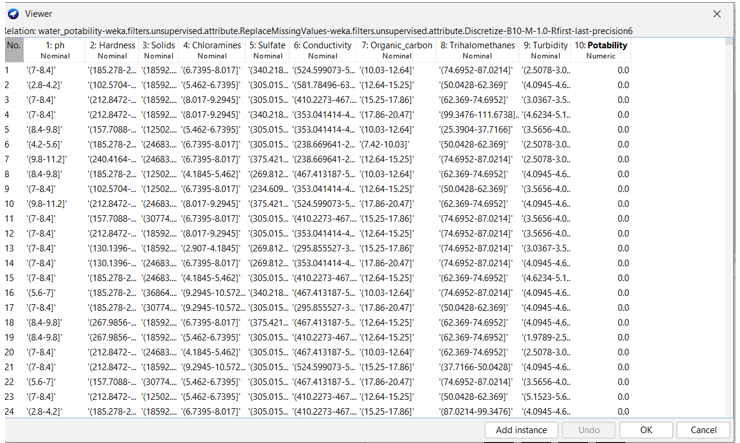

Comparando los datos obtenidos con los del weka en la primera columna podemos ver que:
(7-8.4) = 5.0
(2.8-4.2)= 2.0
Y si usamos los primeros cuatro valores de la columna ph [5.0, 2.0, 5.0, 5.0, ...] vemos que es igual al resultado del scikitlearn

# **Tercera técnica de preprocesamiento Normalize**

El normalizador (normalizer en inglés) es una técnica de preprocesamiento de datos que se utiliza para escalar las características de un conjunto de datos de manera que tengan una magnitud uniforme. Su objetivo es transformar los valores de las características en un rango específico, como [0, 1] o [-1, 1], para que todas tengan la misma importancia durante el análisis.  Además, el normalizador puede ser beneficioso cuando se desean comparar diferentes características que tienen diferentes unidades o magnitudes, ya que coloca todas las características en la misma escala, lo que facilita la comparación y el análisis.


En mi dataset de la calidad del agua puede ser beneficioso normalizar ya que tengo valores en las diferentes columnas muy dispersos en algunos casos hasta el 60000 por eso es mejor trabajar con valores del 0 al 1.

In [8]:
from sklearn.preprocessing import MinMaxScaler

Min-Max Scaling (Escalamiento Min-Max):
Min-Max Scaling escala los datos al rango [0, 1], lo que significa que todos los valores se transformarán para que estén entre 0 y 1.

In [9]:
# Supongamos que tienes tus datos en una matriz llamada "X"
datos5=datos_imputados
scaler = MinMaxScaler()

# Aplica el escalamiento Min-Max a tus datos
datos_normalizados = scaler.fit_transform(datos5)
# Creamos un nuevo DataFrame con los datos normalizados para mostrar como el dataset
datos_normalizados = pd.DataFrame(datos_normalizados, columns=datos.columns)
print(datos_normalizados.head)

<bound method NDFrame.head of             ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1     0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2     0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3     0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4     0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   
...        ...       ...       ...          ...       ...           ...   
3271  0.333436  0.530482  0.775947     0.533436  0.656047      0.603192   
3272  0.557775  0.530016  0.279263     0.603473  0.581699      0.368912   
3273  0.672822  0.465486  0.539101     0.547807  0.581699      0.438152   
3274  0.366197  0.664407  0.191490     0.465860  0.581699      0.387157   
3275  0.562477  0.535635  0.280484     0.560259  0.581699      0.255266   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0     

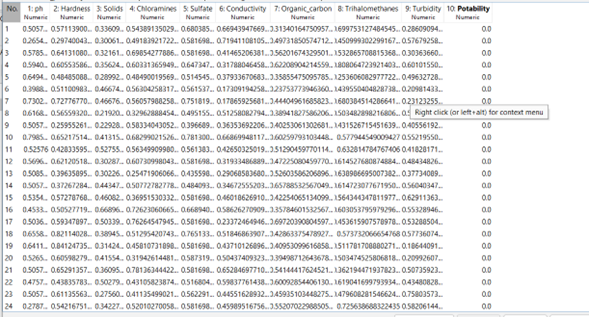

Comparando con los datos del weka (ej. anterior) podemos comparar que con el uso del scikitlearn librería nos da el mismo resultado que al usar Normalizer en weka.